# 一、传入数据

In [1]:
import pymysql
import pandas as pd

# 连接数据库
db = pymysql.connect(host='localhost',port=3306,user='root',passwd='qwer',db='dataany')
# 获取游标
cursor = db.cursor()
tbsql = """
select * from dataany.taobao 
"""
tmsql = "select * from dataany.tianmao"

tbdf = pd.read_sql_query(tbsql,con=db) #tbdf即为淘宝的dataframe
tmdf = pd.read_sql_query(tmsql,con=db)
cursor.close()
db.close()

In [ ]:
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

# 二、数据概览

## 天猫tmdf

In [56]:
tmdf.head(3).T

,0,1,2
店铺id,420751185,389335512,1954193971
店铺名称,美一佳化妆品专营店,露得清官方旗舰店,圣奈海外专营店
位置,江苏 徐州,浙江 嘉兴,日本
商品id,567119376040,568286063319,45051617908
店铺类型,B,B,B
一级类目,美容护肤/美体/精油,美容护肤/美体/精油,美容护肤/美体/精油
二级类目,防晒,防晒,防晒
三级类目,null,null,null
四级类目,null,null,null
叶子类目,防晒,防晒,防晒


In [63]:
#tmdf.info()
import pandas as pd
#对数据进行切片
tmdf.店铺id.value_counts()
tmdf.店铺id.count()

58345

In [48]:
len(list(tmdf.店铺id.unique()))

1694

In [54]:
len(list(tmdf.brand_id.unique()))

959

In [57]:
len(list(tmdf.商品id.unique()))

8519

In [59]:
tmdf['日期'].unique()

array(['2018_10', '2018_11', '2018_1', '2018_12', '2018_2', '2018_3',
       '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9',
       '2019_1', '2019_2', '2019_3'], dtype=object)

In [64]:
tmdf.销量.sum()

40970804

In [65]:
tmdf.销售额.sum()

3404016928.53

天猫共有58345条数据，1694家店铺,959家不同的品牌,8519个不同的商品id，（以上数据都包含空值）
销量40970804个，销售额3404016928.53元

## 淘宝tbdf

In [68]:
tbdf.head(3).T

,0,1,2
店铺id,30458374,2902904189,58746198
店铺名称,程栀敬,王小莉日本代购现货,新美容
位置,辽宁 沈阳,江苏 苏州,江苏 南京
商品id,4231908156,533879211763,546433747329
店铺类型,C,C,C
一级类目,美容护肤/美体/精油,美容护肤/美体/精油,美容护肤/美体/精油
二级类目,防晒,防晒,防晒
三级类目,null,null,null
四级类目,null,null,null
叶子类目,防晒,防晒,防晒


In [74]:
tbdf.店铺id.count()

739236

In [72]:
len(tbdf.店铺id.unique())

55374

In [77]:
len(tbdf.商品id.unique())

198448

In [79]:
len(tbdf.brand_id.unique())

2679

In [81]:
tbdf.销量.sum()

28128437

In [82]:
tbdf.销售额.sum()

2203345268.36

淘宝共有739236条数据，包含55374家店铺，198448个商品，2679个品牌，销量28128437单，销售额2203345268.36元

# 二、数据分析

## 1、各月销售对比

In [3]:
tmdf.head(3).T

,0,1,2
店铺id,420751185,389335512,1954193971
店铺名称,美一佳化妆品专营店,露得清官方旗舰店,圣奈海外专营店
位置,江苏 徐州,浙江 嘉兴,日本
商品id,567119376040,568286063319,45051617908
店铺类型,B,B,B
一级类目,美容护肤/美体/精油,美容护肤/美体/精油,美容护肤/美体/精油
二级类目,防晒,防晒,防晒
三级类目,null,null,null
四级类目,null,null,null
叶子类目,防晒,防晒,防晒


### 天猫

In [122]:
tmdf.日期.unique()

array(['2018_10', '2018_11', '2018_1', '2018_12', '2018_2', '2018_3',
       '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9',
       '2019_1', '2019_2', '2019_3'], dtype=object)

In [157]:
tms = tmdf.groupby(by=['日期'])['销售额','销量'].sum()/10000
tms.columns=['天猫销售额','天猫销量']
tms = tms.reset_index()
tms

,日期,天猫销售额,天猫销量
0,2018_1,3101.085098,34.3682
1,2018_10,5555.975725,58.0612
2,2018_11,20002.328910,163.0941
3,2018_12,6014.822760,62.4911
4,2018_2,4078.034422,48.3635
5,2018_3,27639.369645,356.9572
6,2018_4,36854.298939,488.1760
7,2018_5,42896.434387,556.0012
8,2018_6,50105.692181,662.4501
9,2018_7,26904.489900,365.0998


In [131]:
#import time
#tms.日期 = tms.日期.apply(lambda x:time.strftime('%Y%m%d',time.strptime(x,'%Y_%m')))
#使用time方法进行类型转换也行

In [158]:
tms['日期'] = pd.to_datetime(tms['日期'],format='%Y_%m')

In [159]:
tms.sort_values('日期')

,日期,天猫销售额,天猫销量
0,2018-01-01,3101.085098,34.3682
4,2018-02-01,4078.034422,48.3635
5,2018-03-01,27639.369645,356.9572
6,2018-04-01,36854.298939,488.1760
7,2018-05-01,42896.434387,556.0012
8,2018-06-01,50105.692181,662.4501
9,2018-07-01,26904.489900,365.0998
10,2018-08-01,21525.941444,283.8429
11,2018-09-01,11038.746299,135.0456
1,2018-10-01,5555.975725,58.0612


In [165]:
tms['月份'] =tms.日期.values.astype('datetime64[M]')
tms

,日期,天猫销售额,天猫销量,月份
0,2018-01-01,3101.085098,34.3682,2018-01-01
1,2018-10-01,5555.975725,58.0612,2018-10-01
2,2018-11-01,20002.328910,163.0941,2018-11-01
3,2018-12-01,6014.822760,62.4911,2018-12-01
4,2018-02-01,4078.034422,48.3635,2018-02-01
5,2018-03-01,27639.369645,356.9572,2018-03-01
6,2018-04-01,36854.298939,488.1760,2018-04-01
7,2018-05-01,42896.434387,556.0012,2018-05-01
8,2018-06-01,50105.692181,662.4501,2018-06-01
9,2018-07-01,26904.489900,365.0998,2018-07-01


In [170]:
tms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
日期       15 non-null datetime64[ns]
天猫销售额    15 non-null float64
天猫销量     15 non-null float64
月份       15 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 560.0 bytes


In [176]:
import matplotlib.pyplot as plt
#可视化显示在页面
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B586D3FEB8>,
      dtype=object)

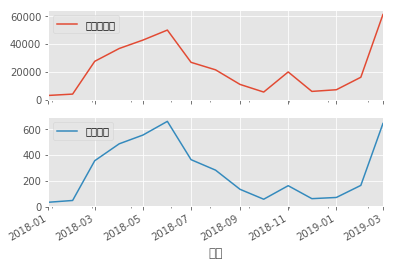

In [211]:
tms.plot(x='月份',y=['天猫销售额','天猫销量'],subplots='天猫销量')

月度销售数量及金额呈现明显的**周期性变化**

In [208]:
plt.savefig('test.png', format='png', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 图片边界空白紧致, 背景透明

<Figure size 432x288 with 0 Axes>

In [125]:
# 天猫2018年全年规模
print('天猫2018年全年规模/万元',tms[0:-3].sum().round(2))

天猫2018年全年规模/万元 销售额    255717.22
销量       3213.95
dtype: float64


### 淘宝

In [142]:
tbs = tbdf.groupby(by=['日期'])['销售额','销量'].sum()/10000
tbs.columns=['淘宝销售额','淘宝销量']
tbs

,淘宝销售额,淘宝销量
日期,,
2018_1,4734.626679,53.0686
2018_10,4545.431676,60.1110
2018_11,5719.982362,67.0846
2018_12,4210.753153,50.8302
2018_2,4870.986372,54.3779
2018_3,21340.385955,267.6337
2018_4,32396.136456,409.4574
2018_5,31766.018717,444.4777
2018_6,24890.583953,339.9475


In [124]:
# 淘宝2018年全年规模
print('淘宝2018年全年规模',tbs[0:-3].sum())

淘宝2018年全年规模 销售额    185072.686413
销量       2406.070500
dtype: float64


对于2018_01-2019_03的销售数据，这个分析各个月的淘宝、天猫销量及销售额变化情况
天猫2018年全年规模 255717.21971000015万元
淘宝2018年全年规模185072.68641300127万元
各月销售数据如上得df，转存到excel中做折线图

In [154]:
#合并两个dataframe内容
alls = pd.merge(left=tms,right=tbs,on='日期')
alls

,天猫销售额,天猫销量,淘宝销售额,淘宝销量
日期,,,,
2018_1,3101.085098,34.3682,4734.626679,53.0686
2018_10,5555.975725,58.0612,4545.431676,60.1110
2018_11,20002.328910,163.0941,5719.982362,67.0846
2018_12,6014.822760,62.4911,4210.753153,50.8302
2018_2,4078.034422,48.3635,4870.986372,54.3779
2018_3,27639.369645,356.9572,21340.385955,267.6337
2018_4,36854.298939,488.1760,32396.136456,409.4574
2018_5,42896.434387,556.0012,31766.018717,444.4777
2018_6,50105.692181,662.4501,24890.583953,339.9475


In [149]:
# 导出到文档中
alls.to_excel('E:\文档\桌面\数据分析作品-防晒\一、时间序列总销售额及销售数量.xlsx')


## 2、产品分析

### （1）商品数量防晒分类分布

In [18]:
tmdf.head().T

,0,1,2,3,4
店铺id,420751185,389335512,1954193971,3697925558,2568052038
销售额,52,11676,3976,1386,4897
新防晒分类,防晒乳/霜,null,null,防晒乳/霜,null


#### a、天猫防晒分类

In [293]:
import numpy as np
# 首先去除所有得null值，然后去除id和属性都重复得，
newtm = tmdf[['商品id','属性:防晒分类']].replace('null',np.NAN)  #df.replace替换null为np.NAN
newtm = newtm.dropna() #丢弃所有NAN得空值
newtm = newtm.drop_duplicates()
newtm = newtm.drop_duplicates(subset=['商品id'],keep=False) #再全部去除34个商品id重复，但是防晒分类不同得异常数据
newtm.head()
#最终获取了5458个不同的商品id+防晒分类，然后进行分析

,商品id,属性:防晒分类
0,567119376040,防晒乳/霜
3,565051815898,防晒乳/霜
6,580830930388,防晒乳/霜
7,549933774910,防晒乳/霜
8,561924094238,防晒乳/霜


In [271]:
# 统计各个词出现的次数
import re
d ={}
for i in list(newtm['属性:防晒分类']):
    i = re.sub(r'"','',i) #去除"
    if i in d:
        d[i]=d[i]+1
    else:
        d[i]=1

print(sum(d.values()))
d

5458


{'防晒乳/霜': 3839,
 '防晒喷雾': 1067,
 '防晒露/凝胶/啫喱': 433,
 '隔离露': 44,
 '晒后修护': 20,
 '其它防晒': 55}

In [272]:
tmres = pd.DataFrame(d,index=['天猫频数']).T
tmres

,天猫频数
防晒乳/霜,3839
防晒喷雾,1067
防晒露/凝胶/啫喱,433
隔离露,44
晒后修护,20
其它防晒,55


#### b、淘宝防晒分类

In [294]:
import numpy as np
# 首先去除所有得null值，然后去除id和属性都重复得，
newtb = tbdf[['商品id','属性:防晒分类']].replace('null',np.NAN)  #df.replace替换null为np.NAN
newtb = newtb.dropna() #丢弃所有NAN得空值
newtb = newtb.drop_duplicates()   #丢弃重复值
newtb = newtb.drop_duplicates(subset=['商品id'],keep=False) #再全部去除31532个商品id重复，但是防晒分类不同的异常数据，直接清楚异常数据
newtb.head()

,商品id,属性:防晒分类
0,4231908156,防晒乳/霜
1,533879211763,防晒乳/霜
2,546433747329,防晒露/凝胶/啫喱
3,550112906259,防晒乳/霜
5,557919479652,防晒乳/霜


In [274]:
# 最终152980
import re
de={}
for i in newtb['属性:防晒分类']:
    i = re.sub(r'"','',i)
    if i in de:
        de[i] = de[i] + 1
    else:
        de[i] = 1
de

{'防晒乳/霜': 108916,
 '防晒露/凝胶/啫喱': 7067,
 '防晒喷雾': 32861,
 '其它防晒': 2189,
 '晒后修护': 328,
 '隔离露': 1612,
 '防晒湿巾': 7}

In [275]:
tbres = pd.DataFrame(de,index=['淘宝频数']).T
tbres

,淘宝频数
防晒乳/霜,108916
防晒露/凝胶/啫喱,7067
防晒喷雾,32861
其它防晒,2189
晒后修护,328
隔离露,1612
防晒湿巾,7


#### 将产品分类打包到一个df中，并输出为excel

In [276]:
tmres

,天猫频数
防晒乳/霜,3839
防晒喷雾,1067
防晒露/凝胶/啫喱,433
隔离露,44
晒后修护,20
其它防晒,55


In [292]:
pd.concat([tbres,tmres],sort=False,axis=1)#.to_excel('E:\文档\桌面\数据分析作品-防晒\二、产品分类.xlsx') #meige按照索引列进行合并

,淘宝频数,天猫频数
防晒乳/霜,108916,3839.0
防晒露/凝胶/啫喱,7067,433.0
防晒喷雾,32861,1067.0
其它防晒,2189,55.0
晒后修护,328,20.0
隔离露,1612,44.0
防晒湿巾,7,NaN


### （2）销售额防晒分类分布

#### a、天猫

In [3]:
tmdf['新防晒分类'] = tmdf['属性:防晒分类'].str.replace(r'"','')  #处理防晒分类数据为新的一列
tmdf.head(2)

,店铺id,店铺名称,位置,商品id,店铺类型,一级类目,二级类目,三级类目,四级类目,叶子类目,...,属性:面部防晒单品,属性:保质期,属性:适用对象,属性:功效,属性:月份,属性:PA值,属性:上市时间,属性:是否为特殊用途化妆品,属性:化妆品净含量,新防晒分类
0,420751185,美一佳化妆品专营店,江苏 徐州,567119376040,B,美容护肤/美体/精油,防晒,null,null,防晒,...,美白防晒乳液促销装,null,所有人群,美白 控油 防晒 隔离 提亮肤色,null,PA+++,2018,是,90g,防晒乳/霜
1,389335512,露得清官方旗舰店,浙江 嘉兴,568286063319,B,美容护肤/美体/精油,防晒,null,null,防晒,...,null,null,null,null,null,null,null,null,null,null


In [4]:
tmtyS = pd.DataFrame(tmdf.groupby(by=['新防晒分类']).销售额.sum()/10000)
tmtyS.columns=['天猫销售额']
tmtyS

,天猫销售额
新防晒分类,
null,112604.735352
其它防晒,627.129182
晒后修护,45.442526
防晒乳/霜,178685.154338
防晒喷雾,39220.426966
防晒露/凝胶/啫喱,7920.705847
隔离露,1298.098642


#### b、淘宝

In [5]:
tbdf['新防晒分类'] = tbdf['属性:防晒分类'].str.replace(r'"','')  #处理防晒分类数据为新的一列
tbdf.head(2)

,店铺id,店铺名称,位置,商品id,店铺类型,一级类目,二级类目,三级类目,四级类目,叶子类目,...,属性:防晒指数,属性:防晒分类,属性:品名,属性:品牌,属性:适用部位,属性:产品类别,属性:PA值,属性:是否为特殊用途化妆品,属性:化妆品净含量,新防晒分类
0,30458374,程栀敬,辽宁 沈阳,4231908156,C,美容护肤/美体/精油,防晒,null,null,防晒,...,SPF12,防晒乳/霜,null,JOSEPHINE/柔丝芬,全身,null,PA+,否,30g/mL,防晒乳/霜
1,2902904189,王小莉日本代购现货,江苏 苏州,533879211763,C,美容护肤/美体/精油,防晒,null,null,防晒,...,SPF50,防晒乳/霜,null,POLA/宝丽,全身,祛斑类、防晒类,PA++++,是,null,防晒乳/霜


In [6]:
tbtyS = pd.DataFrame(tbdf.groupby(by=['新防晒分类']).销售额.sum()/10000)
tbtyS.columns = ['淘宝销售额']
tbtyS

,淘宝销售额
新防晒分类,
null,44318.393329
其它防晒,1142.089934
晒后修护,136.159363
防晒乳/霜,115596.443722
防晒喷雾,52864.948536
防晒湿巾,1.451760
防晒露/凝胶/啫喱,5355.855332
隔离露,919.184860


#### c、合并导出

In [340]:
pd.concat([tmtyS,tbtyS],sort=False,axis=1)

,天猫销售额,淘宝销售额
null,112604.735352,44318.393329
其它防晒,627.129182,1142.089934
晒后修护,45.442526,136.159363
防晒乳/霜,178685.154338,115596.443722
防晒喷雾,39220.426966,52864.948536
防晒露/凝胶/啫喱,7920.705847,5355.855332
隔离露,1298.098642,919.184860
防晒湿巾,NaN,1.451760


In [346]:
pd.concat([tmtyS,tbtyS],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\二、产品分类销售额.xlsx',sheet_name='分类销售额')

### （3）各分类TOP值，搞不定，全部导出，excel分析

### 天猫

In [57]:
#切片获取所需数据
tmdf1 = tmdf[['新防晒分类','品牌','店铺名称','商品id','标题','销售额']]
tmdf1.groupby(by=['新防晒分类'])

In [60]:
for i in tmdf1.groupby(by=['新防晒分类']):
    print(i[0])

null
其它防晒
晒后修护
防晒乳/霜
防晒喷雾
防晒露/凝胶/啫喱
隔离露


In [74]:
for i in tmdf1.groupby(by=['新防晒分类']):
    if i[0] == '防晒乳/霜':
        d1 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '防晒喷雾':
        d2 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '晒后修护':
        d3 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '隔离露':
        d4 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '防晒露/凝胶/啫喱':
        d5 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
d=pd.concat([d1,d2,d3,d4,d5])
d.head()

,新防晒分类,品牌,店铺名称,商品id,标题,销售额
38578,防晒乳/霜,资莱皙,资莱皙旗舰店,569914445797,2瓶|抖音同款防晒霜喷雾全身脖子补水保湿美白防紫外线学生男士女,29452980.00
31583,防晒乳/霜,资莱皙,资莱皙旗舰店,569914445797,2瓶|抖音同款红石榴防晒霜喷雾全身脖子美白防紫外线户外超强男女,27345840.00
58328,防晒乳/霜,ISDIN,isdin官方海外旗舰店,526608696236,ISDIN怡思丁防水隔离防晒霜女SPF50学生军训防汗防紫外线补水保湿,27095816.25
56297,防晒乳/霜,AUDALA,audala旗舰店,570586596151,防晒霜喷雾面部防水防紫外线补水隔离保湿变美白脖子男女学生党50,25574976.00
56498,防晒乳/霜,欧丽源,欧丽源晟宥兴专卖店,573706125534,欧丽源防晒霜涂抹女全身脖子美补水保湿嫩白防紫外线学生男spf50,25405099.50


In [77]:
d.to_excel('1、防晒各类型top5产品.xlsx')

### 淘宝

In [81]:
#切片获取所需数据
tbdf1 = tbdf[['新防晒分类','销售额','品牌','店铺名称','商品id','标题']]
tbdf1.groupby(by=['新防晒分类'])
for i in tbdf1.groupby(by=['新防晒分类']):
    print(i[0])

null
其它防晒
晒后修护
防晒乳/霜
防晒喷雾
防晒湿巾
防晒露/凝胶/啫喱
隔离露


In [86]:
for i in tbdf1.groupby(by=['新防晒分类']):
    if i[0] == '防晒乳/霜':
        d1 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '防晒喷雾':
        d2 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '晒后修护':
        d3 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '隔离露':
        d4 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '防晒露/凝胶/啫喱':
        d5 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
    elif i[0] == '防晒湿巾':
        d6 = pd.DataFrame(i[1]).sort_values(by=['销售额'],ascending=False).head(5)
d=pd.concat([d1,d2,d3,d4,d5,d6])
d.head()

,新防晒分类,销售额,品牌,店铺名称,商品id,标题
259886,防晒乳/霜,1965033.0,SHANGPREE/香蒲丽,小花坊美妆铺0525,567940106767,包邮！小花坊SHANGPREE香蒲丽精华防晒霜清爽无油防晒隔离防辐射
232164,防晒乳/霜,1931114.5,Biore/碧柔,1号购物网98,555983756238,日本BIORE碧柔防晒霜女军训清爽水感防晒保湿凝露隔离SPF50补水50
567026,防晒乳/霜,1871500.8,Biore/碧柔,1号购物网98,555983756238,日本BIORE碧柔防晒霜女军训清爽面部水感防晒保湿隔离SPF50补水50
194237,防晒乳/霜,1803276.0,Biore/碧柔,1号购物网98,555983756238,日本BIORE碧柔防晒霜女军训清爽水感防晒保湿凝露隔离SPF50补水50
344495,防晒乳/霜,1693755.7,Biore/碧柔,1号购物网98,555983756238,日本BIORE碧柔防晒霜女军训清爽水感防晒保湿凝露隔离SPF50补水50


### （4）产品功效分布

产品功效分析，按照商品id进行分析，不分析产品销量，商品id对应一个功效，拆分该功效，进行分析

#### a、天猫

In [3]:
import numpy as np
tmdf['新功效'] = (tmdf['属性:功效'].str.replace(r'"','')).replace('null',np.NAN) #去除异常值,先去出字符串中的"，然后再去除字符中的null

In [4]:
tmdf.head(2)

,店铺id,店铺名称,位置,商品id,店铺类型,一级类目,二级类目,三级类目,四级类目,叶子类目,...,属性:面部防晒单品,属性:保质期,属性:适用对象,属性:功效,属性:月份,属性:PA值,属性:上市时间,属性:是否为特殊用途化妆品,属性:化妆品净含量,新功效
0,420751185,美一佳化妆品专营店,江苏 徐州,567119376040,B,美容护肤/美体/精油,防晒,null,null,防晒,...,美白防晒乳液促销装,null,所有人群,美白 控油 防晒 隔离 提亮肤色,null,PA+++,2018,是,90g,美白 控油 防晒 隔离 提亮肤色
1,389335512,露得清官方旗舰店,浙江 嘉兴,568286063319,B,美容护肤/美体/精油,防晒,null,null,防晒,...,null,null,null,null,null,null,null,null,null,NaN


In [5]:
reslist = list(tmdf[['商品id','新功效']].dropna().drop_duplicates().新功效)
# 结果是8287 rows × 2 columns
len(reslist)

8287

In [6]:
reslist[:6]

['美白\xa0控油\xa0防晒\xa0隔离\xa0提亮肤色',
 '保湿\xa0补水\xa0防晒',
 '保湿补水\xa0防晒\xa0隔离',
 '防晒\xa0遮瑕',
 '防晒',
 '保湿\xa0美白\xa0防晒']

In [7]:
import re
import collections
s=[]
for i in reslist:
    i = re.sub(r',|，','\xa0',i.strip())
    m = re.split(r'\xa0| ',i.strip())
    s = s+m  
res = collections.Counter(s)
res

Counter({'美白': 1205,
         '控油': 685,
         '防晒': 9506,
         '隔离': 4940,
         '提亮肤色': 884,
         '保湿': 3061,
         '补水': 1744,
         '保湿补水': 1535,
         '遮瑕': 618,
         '清爽': 1122,
         '修护': 1022,
         '提升气色': 339,
         '水润': 1463,
         '修饰肤色': 743,
         '晒后修护': 762,
         '滋润': 1273,
         '淡化色斑': 91,
         '其他/other': 177,
         '舒缓肌肤': 280,
         '调理肤色': 137,
         '滋养肌肤': 137,
         '提拉紧致': 42,
         '祛痘/祛粉刺': 6,
         '持久度': 141,
         '隐形毛孔': 96,
         '抗皱防晒': 317,
         '': 54,
         '防': 54,
         '收缩毛孔': 82,
         '防辐射': 81,
         '深度保湿': 166,
         '提亮': 274,
         '损伤修复': 73,
         '去角质': 3,
         '抗敏感': 36,
         '祛斑': 37,
         '清洁毛孔': 17,
         '晒后修复': 8,
         '香体': 1,
         '滋养': 1,
         '改善暗黄': 1})

#### b、淘宝

In [8]:
import numpy as np
tbdf['新功效'] = (tbdf['属性:功效'].str.replace(r'"','')).replace('null',np.NAN) #去除异常值,先去出字符串中的"，然后再去除字符中的null

In [9]:
tbdf.head(2)

,店铺id,店铺名称,位置,商品id,店铺类型,一级类目,二级类目,三级类目,四级类目,叶子类目,...,属性:防晒指数,属性:防晒分类,属性:品名,属性:品牌,属性:适用部位,属性:产品类别,属性:PA值,属性:是否为特殊用途化妆品,属性:化妆品净含量,新功效
0,30458374,程栀敬,辽宁 沈阳,4231908156,C,美容护肤/美体/精油,防晒,null,null,防晒,...,SPF12,防晒乳/霜,null,JOSEPHINE/柔丝芬,全身,null,PA+,否,30g/mL,保湿 补水 滋润 舒缓肌肤
1,2902904189,王小莉日本代购现货,江苏 苏州,533879211763,C,美容护肤/美体/精油,防晒,null,null,防晒,...,SPF50,防晒乳/霜,null,POLA/宝丽,全身,祛斑类、防晒类,PA++++,是,null,美白 防晒


In [10]:
reslist1 = list(tbdf[['商品id','新功效']].dropna().drop_duplicates().新功效)
# 结果是8287 rows × 2 columns
len(reslist1)

213505

In [11]:
import re
import collections
s1=[]
for i in reslist1:
    i = re.sub(r',|，','\xa0',i.strip())
    m1 = re.split(r'\xa0| ',i.strip())
    s1 = s1 + m1  
res1 = collections.Counter(s1)
res1

Counter({'保湿': 76353,
         '补水': 32646,
         '滋润': 28023,
         '舒缓肌肤': 6058,
         '美白': 24639,
         '防晒': 217776,
         '晒后修护': 16342,
         '清爽': 29807,
         '保湿补水': 26177,
         '隔离': 104045,
         '遮瑕': 13944,
         '防辐射': 3168,
         '水润': 26352,
         '晒后修复': 107,
         '修饰肤色': 12751,
         '提升气色': 4270,
         '深度保湿': 2937,
         '持久度': 5119,
         '提亮肤色': 17544,
         '抗敏感': 4472,
         '控油': 16382,
         '修护': 18371,
         '提拉紧致': 467,
         '抗皱防晒': 7127,
         '其他/other': 6580,
         '收缩毛孔': 2173,
         '隐形毛孔': 2956,
         '淡化色斑': 3454,
         '提亮': 3842,
         '损伤修复': 3008,
         '祛斑': 977,
         '调理肤色': 2304,
         '滋养肌肤': 2304,
         '清洁毛孔': 136,
         '祛痘/祛粉刺': 279,
         '去红血丝': 90,
         '': 273,
         '防': 273,
         '去角质': 65,
         '改善暗黄': 3,
         '改善黯哑': 2,
         '水润亮泽': 1,
         '改善黯沉': 1,
         '镇定肌肤': 1,
         '香体': 1,
         '

#### c、合并导出

In [35]:
tmword = pd.DataFrame(res,index=['天猫词频']).T
tbword = pd.DataFrame(res1,index=['淘宝词频']).T
pd.concat([tmword,tbword],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\产品功效.xlsx')
pd.concat([tmword,tbword],sort=False,axis=1).head()

,天猫词频,淘宝词频
美白,1205.0,24639.0
控油,685.0,16382.0
防晒,9506.0,217776.0
隔离,4940.0,104045.0
提亮肤色,884.0,17544.0


### （5）属性:适用部位

In [157]:
tmbuwei = pd.DataFrame(collections.Counter(tmdf[['商品id','属性:适用部位']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适用部位'].str.replace('"','')),index=['天猫词频']).T
tbbuwei = pd.DataFrame(collections.Counter(tbdf[['商品id','属性:适用部位']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适用部位'].str.replace('"','')),index=['淘宝词频']).T
tmbuwei

,天猫词频
全身,3990
面部,824
脸部,7
仅身体可用,65
面部和全身,36
面部和身体,5


In [158]:
tbbuwei

,淘宝词频
全身,111395
面部,39044
面部和全身,1311
仅身体可用,3058
脸部,242
面部和身体,652
眼唇专用,52
眼部,1


In [160]:
pd.concat([tmbuwei,tbbuwei],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\适用部位.xlsx')
pd.concat([tmbuwei,tbbuwei],sort=False,axis=1)

,天猫词频,淘宝词频
全身,3990.0,111395
面部,824.0,39044
脸部,7.0,242
仅身体可用,65.0,3058
面部和全身,36.0,1311
面部和身体,5.0,652
眼唇专用,NaN,52
眼部,NaN,1


### （6）适用对象

In [150]:
tmrenqun = pd.DataFrame(collections.Counter(tmdf[['商品id','属性:适用对象']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适用对象'].str.replace('"','')),index=['天猫词频']).T
tbrenqun = pd.DataFrame(collections.Counter(tbdf[['商品id','属性:适用对象']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适用对象'].str.replace('"','')),index=['淘宝词频']).T
tmrenqun

,天猫词频
所有人群,1782
所有肤质,410
通用,2026
女士,800
儿童,95


In [151]:
tbrenqun

,淘宝词频
女士,20619
通用,54410
所有人群,57769
所有肤质,18438
儿童,3041


In [156]:
pd.concat([tmrenqun,tbrenqun],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\适用对象.xlsx')
pd.concat([tmrenqun,tbrenqun],sort=False,axis=1)

,天猫词频,淘宝词频
所有人群,1782,57769
所有肤质,410,18438
通用,2026,54410
女士,800,20619
儿童,95,3041


### （7）防晒指数分布

In [15]:
import numpy as np
import collections
tmzhi = tmdf[['属性:防晒指数','销售额']].replace('null',np.NAN).dropna().drop_duplicates()
tmzhi['新防晒指数'] = tmzhi['属性:防晒指数'].str.replace('\+|null|"|其他/other|\xa0|SPF|spf| |/|PA','')
tmzhi.head()

,属性:防晒指数,销售额,新防晒指数
0,spf43,52.0,43
2,SPF50,3976.0,50
3,SPF48,1386.0,48
4,SPF50,4897.0,50
6,SPF50,10092.0,50


In [28]:
tmzhi1 = tmzhi.pivot_table(index=['新防晒指数'],values=['销售额'],aggfunc=[np.sum,'count'])
tmzhi1.to_excel('天猫防晒指数.xlsx')

In [29]:
import numpy as np
import collections
tbzhi = tbdf[['属性:防晒指数','销售额']].replace('null',np.NAN).dropna().drop_duplicates()
tbzhi['新防晒指数'] = tbzhi['属性:防晒指数'].str.replace('\+|null|"|其他/other|\xa0|SPF|spf| |/|PA','')
tbzhi1 = tmzhi.pivot_table(index=['新防晒指数'],values=['销售额'],aggfunc=[np.sum,'count'])
tbzhi1.to_excel('淘宝防晒指数.xlsx')

In [135]:
tmzhishu = pd.DataFrame(r,index=['天猫词频']).T
tbzhishu = pd.DataFrame(r1,index=['淘宝词频']).T
pd.concat([tmzhishu,tbzhishu],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\防晒指数.xlsx')
pd.concat([tmzhishu,tbzhishu],sort=False,axis=1).head()

,天猫词频,淘宝词频
43,6.0,66.0
50,2130.0,105781.0
48,18.0,250.0
30,2358.0,35414.0
20,168.0,1853.0


### （8）属性:适合肤质

In [146]:
tmfuzhi = pd.DataFrame(collections.Counter(tmdf[['商品id','属性:适合肤质']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适合肤质'].str.replace('"','')),index=['天猫词频']).T
tbfuzhi = pd.DataFrame(collections.Counter(tbdf[['商品id','属性:适合肤质']].replace('null',np.NAN).dropna().drop_duplicates()['属性:适合肤质'].str.replace('"','')),index=['淘宝词频']).T
tbfuzhi

,淘宝词频
任何肤质,137840
所有肤质,17079
多种肤质,8287
中性及干性肤质,1088
中性，干性，混合性,234
油性及混合性肤质,1521
敏感性肤质,1583
混合型肤质,362
中性肤质,299
油性肤质,61


In [149]:
pd.concat([tmfuzhi,tbfuzhi],sort=False,axis=1).to_excel('E:\文档\桌面\数据分析作品-防晒\适合肤质.xlsx')
pd.concat([tmfuzhi,tbfuzhi],sort=False,axis=1)

,天猫词频,淘宝词频
任何肤质,3929.0,137840
所有肤质,754.0,17079
多种肤质,224.0,8287
油性及混合性肤质,34.0,1521
中性，干性，混合性,24.0,234
敏感性肤质,42.0,1583
中性及干性肤质,24.0,1088
混合型肤质,18.0,362
干性肤质,16.0,217
中性肤质,6.0,299


### （x）月度产品类型变化情况

In [23]:
import numpy as np
# 首先去除所有得null值，然后去除id和属性都重复得，
newtm = tmdf[['商品id','日期','销售额','属性:防晒分类']].replace('null',np.NAN).dropna().drop_duplicates()
newtm['日期'] = newtm['日期'].str.replace('_','/')
newtm['属性:防晒分类'] = newtm['属性:防晒分类'].str.replace('"','')
newtm.to_excel('E:\文档\桌面\数据分析作品-防晒\天猫类型销量变化.xlsx')

In [22]:
import numpy as np
# 首先去除所有得null值，然后去除id和属性都重复得，
newtb = tbdf[['商品id','日期','销售额','属性:防晒分类']].replace('null',np.NAN).dropna().drop_duplicates()
newtb['日期'] = newtb['日期'].str.replace('_','/')
newtb['属性:防晒分类'] = newtb['属性:防晒分类'].str.replace('"','')
newtb.to_excel('E:\文档\桌面\数据分析作品-防晒\淘宝类型销量变化.xlsx')

In [26]:
newtm.groupby('属性:防晒分类').count()

,商品id,日期,销售额
属性:防晒分类,,,
其它防晒,438,438,438
晒后修护,137,137,137
防晒乳/霜,28601,28601,28601
防晒喷雾,5951,5951,5951
防晒露/凝胶/啫喱,3461,3461,3461
隔离露,277,277,277


### （x1）最受欢迎价位段销售额

In [102]:
tmdf2 = tmdf[['商品id','日期','折扣价','销量','销售额']]
tmdf2.head()

,商品id,日期,折扣价,销量,销售额
0,567119376040,2018_10,52.0,1,52.0
1,568286063319,2018_10,139.0,84,11676.0
2,45051617908,2018_10,56.0,71,3976.0
3,565051815898,2018_10,99.0,14,1386.0
4,566784617964,2018_10,59.0,83,4897.0


In [116]:
tmdf2['价格区间'] = pd.cut(tmdf2.折扣价,bins=[0,25,50,75,100,125,150,175,200,3000])

E:\software\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
tmdf2.to_excel('天猫受欢迎价格段销售.xlsx')

In [118]:
tbdf2 = tbdf[['商品id','日期','折扣价','销量','销售额']]
tbdf2['价格区间'] = pd.cut(tbdf2.折扣价,bins=[0,25,50,75,100,125,150,175,200,3000])
tbdf2.head()

E:\software\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,商品id,日期,折扣价,销量,销售额,价格区间
0,4231908156,2018_10,198.0,2,396.0,"(175, 200]"
1,533879211763,2018_10,228.0,3,684.0,"(200, 3000]"
2,546433747329,2018_10,38.0,1,38.0,"(25, 50]"
3,550112906259,2018_10,130.0,5,650.0,"(125, 150]"
4,555170318763,2018_10,58.0,1,58.0,"(50, 75]"


In [119]:
tbdf2.to_excel('淘宝受欢迎价格段销售.xlsx')

# 以下是测试内容，测试可视化

In [204]:
tmplo = tmdf['折扣价'].value_counts().sort_index().head(500)
tmplo.head()

0.01    2
1.00    4
5.00    1
6.18    2
7.03    1
Name: 折扣价, dtype: int64

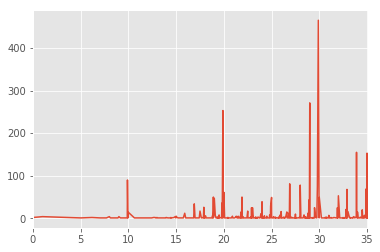

In [205]:
tmplo.plot()